# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
# It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible 
# delay is key to doing good research.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
# along with a large collection of high-level mathematical functions to operate on these arrays.
# Sequential - It creates a model that is a linear stack of layers.
# Flatten - It flattens the input and also it does not affect the batch size.
# Convolution2D - This actually performs the 2D convolution on the input vector and produce the convoluted output.
# Dense - It implements the operation that is output i equal to activation(dot(input, kernel) + bias) where activation is the element-wise
# activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
# and bias is a bias vector created by the layer. 
# Dropout - It applies Dropout to the input. It consists of randomly setting a fraction rate of input units to 0 at each update during 
# training time, which helps prevent overfitting.

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Loads the mnist training and testing data into respective variables.

(60000, 28, 28)


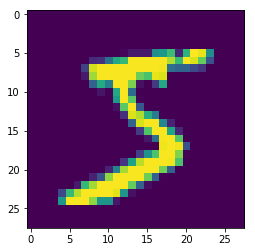

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# Matplotlib is a Python 2D plotting library which produces publication quality figures 
# in a variety of hardcopy formats and interactive environments across platforms. 
# Here we use it to show an example of how an image in a mnist training data looks like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# numpy.reshape() gives a new shape to an array without changing its data.
# Here it is done to indicate the the number of color channels , here it is 1 as it is a grayscale image.
# If it was a RGB it will be changed to 3.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# ndarray.astype() is used to cast a copy of the array to a specified type.
# And we divide the whole training and testing data by 255 to normalise it to values between 0 and 1.

In [9]:
y_train[:10]

# Here we print the training outputs to check whether all 10 distinct outputs are there or not.

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# to_categorical - Converts a class vector (integers) to binary class matrix.
# It returns binary matrix representation of the input, where the bit corresponding to each class number wiil be 1 and 
# everything else is 0.

In [11]:
Y_train[:10]

# Here we print out the binary matrix representation of the training output. 


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', use_bias = False, input_shape=(28,28,1)))
model.add(BatchNormalization())
#model.add(Convolution2D(16, 3, 3, activation='relu', use_bias = False))
#model.add(Convolution2D(16, 3, 3, activation='relu', use_bias = False))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu', use_bias = False))
model.add(Convolution2D(8, 3, 3, activation='relu', use_bias = False))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(16, 1, 1, activation='relu', use_bias = False))
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias = False))
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias = False))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu', use_bias = False))
model.add(Convolution2D(32, 3, 3, activation='relu', use_bias = False))
#model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1, activation='relu', use_bias = False))
model.add(Convolution2D(10, 3, 3, use_bias = False))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Activation('softmax'))


# As we know Sequential creates a model that is a linear stack of layers.model.add() adds layers one by one  in this stack.
# Activation - It can be used through an Activation layer, or through the activation argument supported by all forward layers.
# Here we use 'relu 'in the argument of add(). ReLU converts all the pixel values between [-1,1] to [0,1].
# MaxPooling2D - It performs Max pooling operation for spatial data. Here we spcify 2x2 maxpooling , therefore it will take the max 
# value of various 2x2 sections of the image , and the output size of the image will reduce by half or else in other words 
# we filter out 75% of data. 
# At last we flatten the data using Flatten() and using softmax activation to get the final output.
# Softmax - It is used because some vector components could be negative, or greater than one; and might not sum to 1, but after applying 
# softmax,each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities.
# And during prediction the highest probability one will be taken as the output and if this matches the ground truth , 
# we have a correct prediction , otherwise a false prediction.
# The first argument of the Convolution2D is the number of 3x3 filters that is used in that layer
# summary() prints the summary of the whole network.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3),

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_35 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 13, 13, 8)         256       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 11, 11, 8)         576       
_________________________________________________________________
batch_normalization_36 (Batc (None, 11, 11, 8)         32        
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 9, 9, 16)          1152      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# complile() configures the model for training and we define what all metrics is calculated during training, 
# here its accurancy only.
# categorical_crossentropy- It is a Softmax activation plus a Cross-Entropy loss. If we use this loss, we will train a CNN 
# to output a probability over the C-classes for each image.
# Since we have mulitple classes , we use categorical crossentropy to calculate the loss.
# Adam - Adam is an optimization algorithm that can used to update network weights iterative based in training data.
# After calculating the loss, we use adam with the help of the categorical_crossentropy loss calculated of the training data.

In [58]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_split = 0.2)

# fit() trains the above model for a given number of epochs.
# Epochs are the number of iterations on a dataset.
# We also define batch size = 32 , which the number of images passed through the network for each epoch.
# verbose is set to 1 so that we can see the progess bar.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 15s 313us/step - loss: 0.4505 - acc: 0.9137 - val_loss: 0.1296 - val_acc: 0.9765
Epoch 2/20
48000/48000 [==============================] - 13s 267us/step - loss: 0.1610 - acc: 0.9698 - val_loss: 0.0755 - val_acc: 0.9826
Epoch 3/20
48000/48000 [==============================] - 13s 265us/step - loss: 0.1093 - acc: 0.9770 - val_loss: 0.0783 - val_acc: 0.9838
Epoch 4/20
48000/48000 [==============================] - 14s 283us/step - loss: 0.0815 - acc: 0.9819 - val_loss: 0.0482 - val_acc: 0.9873
Epoch 5/20
48000/48000 [==============================] - 13s 277us/step - loss: 0.0638 - acc: 0.9857 - val_loss: 0.0472 - val_acc: 0.9880
Epoch 6/20
48000/48000 [==============================] - 13s 266us/step - loss: 0.0531 - acc: 0.9881 - val_loss: 0.0410 - val_acc: 0.9894
Epoch 7/20
48000/48000 [==============================] - 13s 266us/step - loss: 0.0452 - acc: 0.9888 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

# evaluvate() returns the loss value & accuracy for the model in test mode.
# Here also computation is done in batches.

In [60]:
print(score)

# Here we the test score , which is a list of scalars which includes loss and accuracy.

[0.028069334036204964, 0.9932]


In [0]:
y_pred = model.predict(X_test)

# predict() generates output predictions for the input samples.
# Here also computation is done in batches.

In [0]:
print(y_pred[:9])
print(y_test[:9])

# Here we print the output predictions from the model and the outputs from the ground truth, 
# to check how much correct predictions we got.

[[3.37909633e-17 3.55268903e-21 5.59078096e-11 1.91730687e-10
  1.52657210e-27 1.31130396e-24 8.62701534e-32 1.00000000e+00
  3.10044300e-17 7.99942838e-12]
 [4.82735669e-22 4.11242106e-17 1.00000000e+00 1.74137554e-24
  4.27515153e-23 2.29647694e-28 6.63461527e-13 7.35231329e-21
  7.45983374e-22 3.56932612e-23]
 [1.68055787e-17 1.00000000e+00 6.07754136e-14 2.78953293e-13
  1.10352061e-10 4.82193840e-10 1.45849383e-13 2.54674347e-13
  5.77487391e-09 3.88747736e-13]
 [1.00000000e+00 2.55805529e-22 8.58915364e-17 2.02234590e-22
  6.03357739e-23 9.36828763e-17 2.52892081e-13 5.82113299e-20
  1.01383036e-17 2.14456884e-13]
 [1.57423818e-19 1.57376314e-20 6.81112976e-19 4.71042766e-21
  1.00000000e+00 1.95572025e-20 3.93696599e-16 1.60990083e-24
  2.00213761e-12 7.16080806e-10]
 [6.98145365e-21 1.00000000e+00 4.12222780e-14 1.68189919e-16
  7.77625273e-12 2.41470247e-16 4.01194798e-18 1.04245382e-13
  5.30700137e-12 5.61816710e-15]
 [1.04397694e-30 1.21502257e-16 5.41182130e-18 1.90960622e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print (layer_dict)

# Creates a dictionary of convolution layers outputs with their corresponding layer names. 

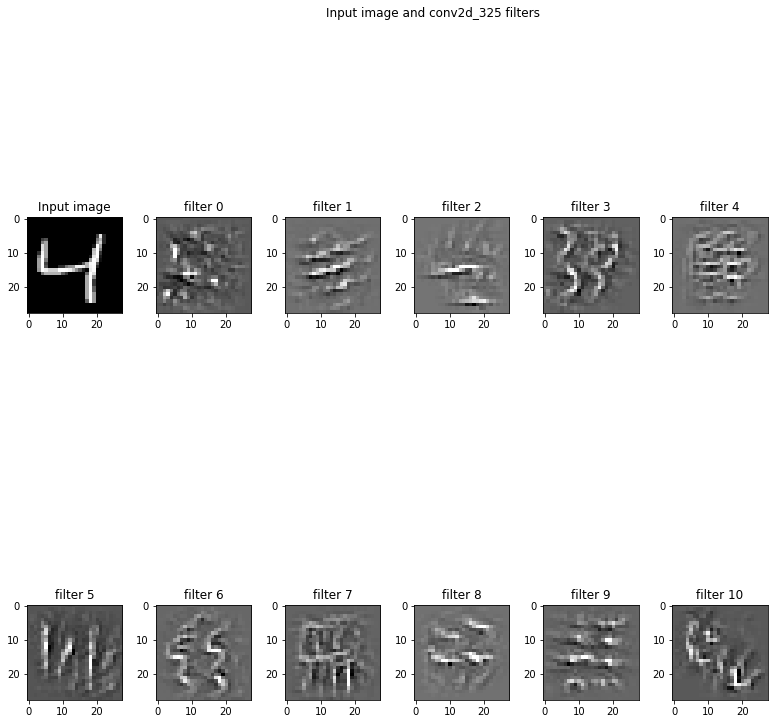

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_325'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()


# This part of code prints out the the matplot visualizations of any convolution layer, including the input image
# and its filter images. We just have to specify the convolution layer name.
# deprocess_image() converts the tensor into a valid image
# vis_img_in_filter() does the rest of the processing for each filter in a layer.